In [3]:
import nibabel as nib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import random
import pickle
import os
from scipy import ndimage
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
import cv2

# Spracovanie dát

## Ukážka dát

In [4]:
data_path = '/Users/kuko/Desktop/projekt/BraTS2021'

print(os.listdir(data_path))

training_path = os.path.join(data_path, 'train/')
testing_path = os.path.join(data_path, 'test/')
validation_path = os.path.join(data_path, 'val/')

['.DS_Store', 'test', 'train', 'val']


/Users/kuko/Desktop/projekt/BraTS2021/test/BraTS2021_01621/BraTS2021_01621_t1ce.nii.gz
(240, 240, 155)
[   0.           24.12896156   26.49344254 ... 5045.83398438 5102.08984375
 5155.81396484]


NameError: name 'cmap' is not defined

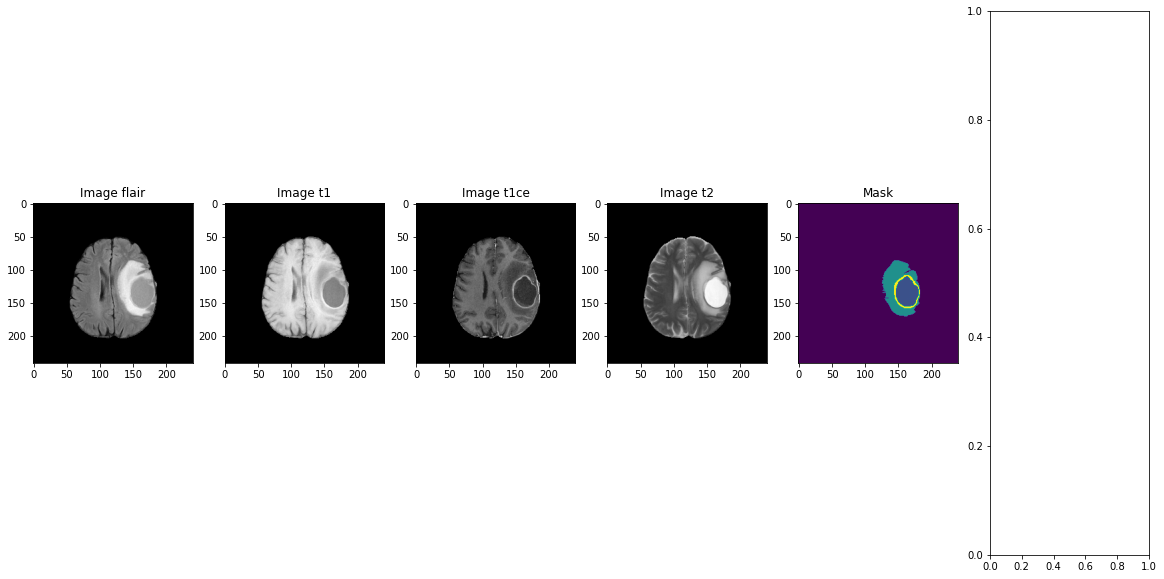

In [5]:
# test_image_t1ce=nib.load(training_path + 'BraTS2021_00002/BraTS2021_00002_t1ce.nii.gz').get_fdata()
# test_image_t1=nib.load(training_path + 'BraTS2021_00002/BraTS2021_00002_t1.nii.gz').get_fdata()
# test_image_flair=nib.load(training_path + 'BraTS2021_00002/BraTS2021_00002_flair.nii.gz').get_fdata()
# test_image_t2=nib.load(training_path + 'BraTS2021_00002/BraTS2021_00002_t2.nii.gz').get_fdata()
# test_mask=nib.load(training_path + 'BraTS2021_00002/BraTS2021_00002_seg.nii.gz').get_fdata()

test_image_t1ce=nib.load(testing_path + 'BraTS2021_01621/BraTS2021_01621_t1ce.nii.gz').get_fdata()
test_image_t1=nib.load(testing_path + 'BraTS2021_01621/BraTS2021_01621_t1.nii.gz').get_fdata()
test_image_flair=nib.load(testing_path + 'BraTS2021_01621/BraTS2021_01621_flair.nii.gz').get_fdata()
test_image_t2=nib.load(testing_path + 'BraTS2021_01621/BraTS2021_01621_t2.nii.gz').get_fdata()
test_mask=nib.load(testing_path + 'BraTS2021_01621/BraTS2021_01621_seg.nii.gz').get_fdata()

print(testing_path + 'BraTS2021_01621/BraTS2021_01621_t1ce.nii.gz')

# start = 30
# koniec = 120
slice = 90
print(test_image_flair.shape)
print(np.unique(test_image_t1ce))

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,6, figsize = (20, 10))
ax1.imshow(ndimage.rotate(test_image_flair[:,:,slice], 270), cmap = 'gray')
ax1.set_title('Image flair')
ax2.imshow(ndimage.rotate(test_image_t1[:,:,slice], 270), cmap = 'gray')
ax2.set_title('Image t1')
ax3.imshow(ndimage.rotate(test_image_t1ce[:,:,slice], 270), cmap = 'gray')
ax3.set_title('Image t1ce')
ax4.imshow(ndimage.rotate(test_image_t2[:,:,slice], 270), cmap = 'gray')
ax4.set_title('Image t2')
ax5.imshow(ndimage.rotate(test_mask[:,:,slice], 270))
ax5.set_title('Mask')

# test_mask[test_mask==4] = 3

# test_mask[test_mask==1] = 0
# test_mask[test_mask==2] = 0
# test_mask[test_mask==3] = 1
# print(np.unique(test_mask))

ax6.imshow(ndimage.rotate(test_mask[:,:,slice], 270), cmap=cmap)
ax6.set_title('New mask')
plt.show()

### Augmentations

In [6]:
import albumentations as A
import cv2

transform = A.Compose([
    #A.HorizontalFlip(p=0.3),
    #A.VerticalFlip(p=0.5),
    A.Rotate(p=1, limit=(-20,20), border_mode=cv2.BORDER_CONSTANT),
])

[0. 1. 2. 4.]


(-0.5, 239.5, 239.5, -0.5)

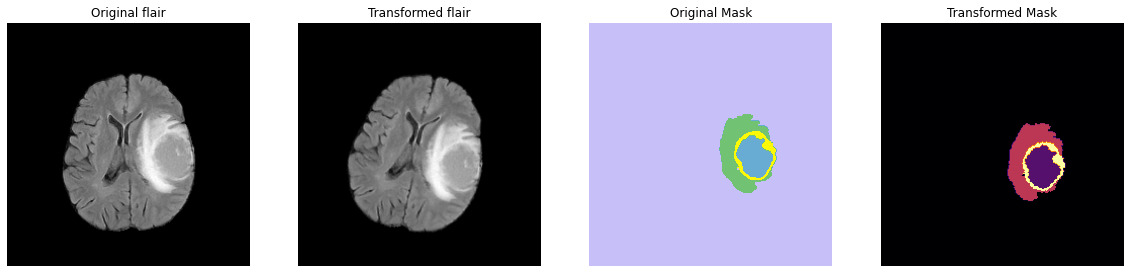

In [7]:
from matplotlib.colors import ListedColormap

# [250/256, 104/256, 72/256, 1], # Orange
# [147/256, 135/256, 229/256, 1] # Purple
# [200/256, 192/256, 249/256, 1] # LightPurple
# [105/256, 173/256, 212/256, 1] # Blue
# [246/256, 250/256, 255/256, 1] # LightBlue

colorarray=[
  [200/256, 192/256, 249/256, 1], # Background
  [200/256, 192/256, 249/256, 1], # Background
  [105/256, 173/256, 212/256, 1], # Necrotic
  [105/256, 173/256, 212/256, 1], # Necrotic
  [105/256, 173/256, 212/256, 1], # Necrotic
  [114/256, 195/256, 116/256, 1], # Edema
  [114/256, 195/256, 116/256, 1], # Edema
  [114/256, 195/256, 116/256, 1], # Edema
  [254/256, 249/256, 9/256, 1], # Enhancing
  [254/256, 249/256, 9/256, 1], # Enhancing
  [254/256, 249/256, 9/256, 1], # Enhancing
]
cmap = ListedColormap(colorarray)

t = transform(image=test_image_flair, mask=test_mask)
image = t['image']
mask = t['mask']

print(np.unique(mask))

_, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 10))
ax1.imshow(ndimage.rotate(test_image_flair[:,:,80], 270), cmap = 'gray')
ax1.set_title('Original flair')
ax1.axis('off')
ax2.imshow(ndimage.rotate(image[:,:,80], 270), cmap = 'gray')
ax2.set_title('Transformed flair')
ax2.axis('off')
ax3.imshow(ndimage.rotate(test_mask[:,:,80], 270), cmap = cmap)
ax3.set_title('Original Mask')
ax3.axis('off')
ax4.imshow(ndimage.rotate(mask[:,:,80], 270), cmap = 'inferno')
ax4.set_title('Transformed Mask')
ax4.axis('off')

In [322]:
volume_start = 13
total_slices = 128
for i in range(volume_start, total_slices, 1):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 10))
    ax1.imshow(ndimage.rotate(test_image_flair[:,:,i], 270), cmap = 'gray')
    ax1.set_title('Image flair')
    ax2.imshow(ndimage.rotate(test_image_t1ce[:,:,i], 270), cmap = 'gray')
    ax2.set_title('Image t1ce')
    ax3.imshow(ndimage.rotate(test_image_t2[:,:,i], 270), cmap = 'gray')
    ax3.set_title('Image t2')
    ax4.imshow(ndimage.rotate(test_mask[:,:,i], 270), cmap = cmap)
    ax4.set_title('Mask')
    fig.savefig(f'outputs/slices_original/slice_{i}.png')
    plt.close()

In [10]:
def get_dimensions(img, scale=.7):
    center_x, center_y = img.shape[1] / 2, img.shape[0] / 2
    width_scaled, height_scaled = img.shape[1] * scale, img.shape[0] * scale
    left_x, right_x = center_x - width_scaled / 2, center_x + width_scaled / 2
    top_y, bottom_y = center_y - height_scaled / 2, center_y + height_scaled / 2
    return int(left_x), int(right_x), int(top_y), int(bottom_y)

In [11]:
horizontalFlip = A.Compose([A.HorizontalFlip(p=1)], additional_targets={"image1" : "image"}) # 30%
verticalFlip = A.Compose([A.VerticalFlip(p=1)], additional_targets={"image1" : "image"}) # 50%
randomRotate = A.Compose([A.Rotate(p=1, limit=(-60, 60), border_mode=cv2.BORDER_CONSTANT)],
                         additional_targets={"image1" : "image"}) # 50%

In [12]:
import random

#image = cv2.resize(test_image_flair[:,:,80], (128, 128), interpolation=cv2.INTER_NEAREST)
#left_x, right_x, top_y, bottom_y = get_dimensions(image[:,:])
#image = image[left_x:right_x, top_y:bottom_y]
#image = test_image_flair[:,:,80]
#mask = test_mask[:,:,80]

image = test_image_flair[:,:,:]
mask = test_mask[:,:,:]

volume_start = 13
total_slices = 128

augmentations = {'horizontal': False, 'vertical': False, 'rotate': False}
#horizontalTransform = horizontalFlip(image=image, mask=mask)
#verticalTransform = verticalFlip(image=image, mask=mask)
#rotateTransform = randomRotate(image=image, mask=mask)

if random.random() < 0.3:
    augmentations['horizontal'] = True

if random.random() < 0.5:
    augmentations['vertical'] = True

if random.random() < 0.6:
    augmentations['rotate'] = True

tmp_img = np.zeros((240, 240, 128))
tmp_mask = np.zeros((240, 240, 128))
if augmentations['horizontal'] or augmentations['vertical'] or augmentations['rotate']:
    for i in range(total_slices):
        if augmentations['horizontal']:
            t = horizontalFlip(image=image[:,:,i+volume_start], image1=image, mask=mask[:,:,i+volume_start])
            tmp_img[:,:,i] = t['image']
            tmp_mask[:,:,i] = t['mask']

        if augmentations['vertical']:
            t = verticalFlip(image=image[:,:,i+volume_start], mask=mask[:,:,i+volume_start])
            tmp_img[:,:,i] = t['image']
            tmp_mask[:,:,i] = t['mask']

        if augmentations['rotate']:
            t = randomRotate(image=image[:,:,i+volume_start], mask=mask[:,:,i+volume_start])
            tmp_img[:,:,i] = t['image']
            tmp_mask[:,:,i] = t['mask']
else:
    tmp_img = image
    tmp_mask = mask

In [13]:
volume_start = 13
total_slices = 128
for i in range(volume_start, total_slices, 1):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 10))
    ax1.imshow(ndimage.rotate(test_image_flair[:,:,i], 270), cmap = 'gray')
    ax1.set_title('Original flair')
    ax2.imshow(ndimage.rotate(image[:,:,i], 270), cmap = 'gray')
    ax2.set_title('Transformed flair')
    ax3.imshow(ndimage.rotate(test_mask[:,:,i], 270))
    ax3.set_title('Original Mask')
    ax4.imshow(ndimage.rotate(mask[:,:,i], 270))
    ax4.set_title('Transformed Mask')
    fig.savefig(f'outputs/slices/slice_{i}.png')
    plt.close()

In [14]:
import random

image = test_image_flair[:,:,:]
mask = test_mask[:,:,:]

if random.random() < 0.3:
    t = horizontalFlip(image=image, image1=image, mask=mask)
    image = t['image']
    mask = t['mask']

if random.random() < 0.5:
    t = verticalFlip(image=image, mask=mask)
    image = t['image']
    mask = t['mask']

if random.random() < 0.6:
    t = randomRotate(image=image, mask=mask)
    image = t['image']
    mask = t['mask']

Text(0.5, 1.0, 'Transformed Mask')

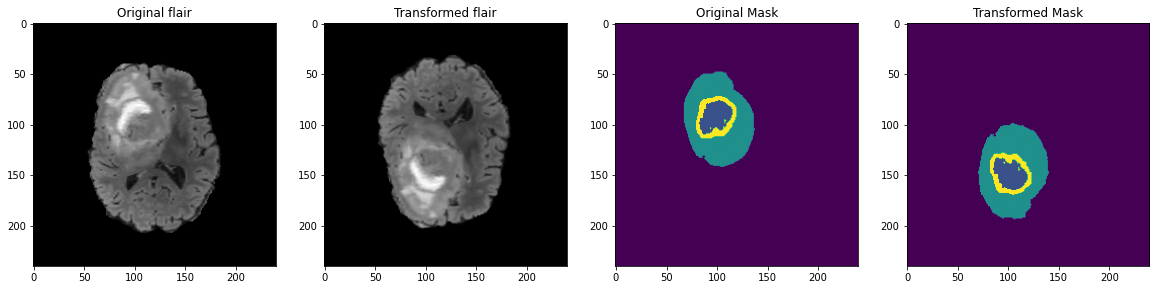

In [15]:
_, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 10))
ax1.imshow(ndimage.rotate(test_image_flair[:,:,80], 270), cmap = 'gray')
ax1.set_title('Original flair')
ax2.imshow(ndimage.rotate(image[:,:,80], 270), cmap = 'gray')
ax2.set_title('Transformed flair')
ax3.imshow(ndimage.rotate(test_mask[:,:,80], 270))
ax3.set_title('Original Mask')
ax4.imshow(ndimage.rotate(mask[:,:,80], 270))
ax4.set_title('Transformed Mask')


# Data generator

In [8]:
from tensorflow import keras
import numpy as np
import nibabel as nib
import albumentations as A
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
import cv2
import random

# based on https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly
class BratsGen(keras.utils.Sequence):
    def __init__(self, flair_list, t1ce_list, t2_list, mask_list, img_dim=(128,128,128),
                 img_channels=3, classes=4, batch_size=2, segmenting_subregion=0, aug=False):
        self.batch_size = batch_size
        self.classes = classes
        self.img_channels = img_channels
        self.img_dim = img_dim
        self.flair_list = flair_list
        self.t1ce_list = t1ce_list
        self.t2_list = t2_list
        self.mask_list = mask_list
        self.segmenting_subregion = segmenting_subregion
        self.aug = aug

    def __len__(self):
        return len(self.flair_list) // self.batch_size

    def __getitem__(self, idx):
        i = idx * self.batch_size
        batch_flair = self.flair_list[i : i + self.batch_size]
        batch_t1ce = self.t1ce_list[i : i + self.batch_size]
        batch_t2 = self.t2_list[i : i + self.batch_size]
        batch_mask = self.mask_list[i : i + self.batch_size]

        X, y = self.__data_generation(batch_flair, batch_t1ce, batch_t2, batch_mask)

        return X, y

    # based on https://stackoverflow.com/a/44007180
    def __get_dimensions(self, img, scale=.7):
        center_x, center_y = img.shape[1] / 2, img.shape[0] / 2
        width_scaled, height_scaled = img.shape[1] * scale, img.shape[0] * scale
        left_x, right_x = center_x - width_scaled / 2, center_x + width_scaled / 2
        top_y, bottom_y = center_y - height_scaled / 2, center_y + height_scaled / 2
        return int(left_x), int(right_x), int(top_y), int(bottom_y)

    # normalisation based on https://stackoverflow.com/a/59601298
    def __normalise(self, image):
        scaler = MinMaxScaler()
        image = scaler.fit_transform(image.reshape(-1, image.shape[-1])).reshape(image.shape)
        return image

    # augmentations
    def __augmentation(self, flair, t1ce, t2, mask):
        horizontalFlip = A.Compose([A.HorizontalFlip(p=1)], 
                                    additional_targets={'image1' : 'image', 'image2': 'image', 'image3': 'image'}) # 30%
        verticalFlip = A.Compose([A.VerticalFlip(p=1)], 
                                    additional_targets={'image1' : 'image', 'image2': 'image', 'image3': 'image'}) # 50%
        randomRotate = A.Compose([A.Rotate(p=1, limit=(-60, 60), border_mode=cv2.BORDER_CONSTANT)],
                                    additional_targets={'image1' : 'image', 'image2': 'image', 'image3': 'image'}) # 50%

        #image = test_image_flair[:,:,:]
        #mask = test_mask[:,:,:]

        if random.random() < 0.3:
            t = horizontalFlip(image=flair, image2=t1ce, image3=t2, mask=mask)
            flair = t['image']
            t1ce = t['image2']
            t2 = t['image3']
            mask = t['mask']

        if random.random() < 0.5:
            t = verticalFlip(image=flair, image2=t1ce, image3=t2, mask=mask)
            flair = t['image']
            t1ce = t['image2']
            t2 = t['image3']
            mask = t['mask']

        if random.random() < 0.6:
            t = randomRotate(image=flair, image2=t1ce, image3=t2, mask=mask)
            flair = t['image']
            t1ce = t['image2']
            t2 = t['image3']
            mask = t['mask']

        return flair, t1ce, t2, mask

    def __data_generation(self, flair_list, t1ce_list, t2_list, mask_list):
        images = []
        masks = []
        for flair_name, t1ce_name, t2_name, mask_name in zip(flair_list, t1ce_list, t2_list, mask_list):
            flair = nib.load(flair_name).get_fdata()
            t1ce = nib.load(t1ce_name).get_fdata()
            t2 = nib.load(t2_name).get_fdata()
            mask = nib.load(mask_name).get_fdata()

            # crop the images and mask
            left_x, right_x, top_y, bottom_y = self.__get_dimensions(flair[:,:,0])
            flair = flair[left_x:right_x, top_y:bottom_y,:]
            t1ce = t1ce[left_x:right_x, top_y:bottom_y,:]
            t2 = t2[left_x:right_x, top_y:bottom_y,:]
            mask = mask[left_x:right_x, top_y:bottom_y,:]

            volume_start = 13
            volume_end = 141
            total_slices = 128
            tmp_flair = np.zeros((128, 128, 128))
            tmp_t1ce = np.zeros((128, 128, 128))
            tmp_t2 = np.zeros((128, 128, 128))
            tmp_mask = np.zeros((128, 128, 128))

            # resize the images and mask
            inter = cv2.INTER_NEAREST
            for i in range(total_slices):
                tmp_flair[:,:,i] = cv2.resize(flair[:,:,i+volume_start], (128, 128), interpolation=inter)
                tmp_t1ce[:,:,i] = cv2.resize(t1ce[:,:,i+volume_start], (128, 128), interpolation=inter)
                tmp_t2[:,:,i]= cv2.resize(t2[:,:,i+volume_start], (128, 128), interpolation=inter)
                tmp_mask[:,:,i]= cv2.resize(mask[:,:,i+volume_start], (128, 128), interpolation=inter)
            flair = tmp_flair
            t1ce = tmp_t1ce
            t2 = tmp_t2
            mask = tmp_mask

            # augmentations
            if self.aug:
                flair, t1ce, t2, mask = self.__augmentation(flair, t1ce, t2, mask)

            #==================== Sequences ====================#
            # normalise
            flair = self.__normalise(flair)
            t1ce = self.__normalise(t1ce)
            t2 = self.__normalise(t2)

            # stack the sequences
            if self.img_channels == 3:
                image = np.stack([flair, t1ce, t2], axis=3)
            else:
                image = np.stack([flair, t1ce], axis=3)

            #==================== Mask ====================#
            # change label 4 to label 3 because label 3 is empty
            mask[mask == 4] = 3

            # segmenting label 1
            if self.segmenting_subregion == 1:
                mask[mask == 2] = 0
                mask[mask == 3] = 0
            # segmenting label 2
            elif self.segmenting_subregion == 2:
                mask[mask == 1] = 0
                mask[mask == 3] = 0
                mask[mask == 2] = 1
            # segmenting label 3
            elif self.segmenting_subregion == 3:
                mask[mask == 1] = 0
                mask[mask == 2] = 0
                mask[mask == 3] = 1

            # encode
            if self.segmenting_subregion == 0:
                mask = to_categorical(mask, num_classes=4)
            else:
                mask = to_categorical(mask, num_classes=2)
                #mask = tf.one_hot(mask, 1, on_value=0, off_value=1)

            images.append(image)
            masks.append(mask)

        images = np.array(images)
        masks = np.array(masks)

        #return images/np.max(images), masks
        return images, masks

na načítanie dát/obrázkov,

ten data generátor, čo je v keras pracuje len s obrázkami (.png, .jpeg, ...)

In [9]:
def get_dimensions(img, scale=.7):
    center_x, center_y = img.shape[1] / 2, img.shape[0] / 2
    width_scaled, height_scaled = img.shape[1] * scale, img.shape[0] * scale
    left_x, right_x = center_x - width_scaled / 2, center_x + width_scaled / 2
    top_y, bottom_y = center_y - height_scaled / 2, center_y + height_scaled / 2
    return int(left_x), int(right_x), int(top_y), int(bottom_y)

In [10]:
 # normalisation based on https://stackoverflow.com/a/59601298
def normalise(image):
    scaler = MinMaxScaler()
    image = scaler.fit_transform(image.reshape(-1, image.shape[-1])).reshape(image.shape)
    return image

In [11]:
def load_img(flair_list, t1ce_list, t2_list, img_channels):
    images = []
    for flair_name, t1ce_name, t2_name in zip(flair_list, t1ce_list, t2_list):
        flair = nib.load(flair_name).get_fdata()
        t1ce = nib.load(t1ce_name).get_fdata()
        t2 = nib.load(t2_name).get_fdata()

        # crop the images and mask
        left_x, right_x, top_y, bottom_y = get_dimensions(flair[:,:,0])
        #print(left_x, right_x, top_y, bottom_y)
        flair = flair[left_x:right_x, top_y:bottom_y,:]
        t1ce = t1ce[left_x:right_x, top_y:bottom_y,:]
        t2 = t2[left_x:right_x, top_y:bottom_y,:]

        volume_start = 13
        tmp_flair = np.zeros((128, 128, 128))
        tmp_t1ce = np.zeros((128, 128, 128))
        tmp_t2 = np.zeros((128, 128, 128))

        inter = cv2.INTER_NEAREST
        for i in range(128):
            tmp_flair[:,:,i] = cv2.resize(flair[:,:,i+volume_start], (128, 128), interpolation=inter)
            tmp_t1ce[:,:,i] = cv2.resize(t1ce[:,:,i+volume_start], (128, 128), interpolation=inter)
            tmp_t2[:,:,i]= cv2.resize(t2[:,:,i+volume_start], (128, 128), interpolation=inter)
        flair = tmp_flair
        t1ce = tmp_t1ce
        t2 = tmp_t2

        # normalise
        flair = normalise(flair)
        t1ce = normalise(t1ce)
        t2 = normalise(t2)

        # stack the sequences
        if img_channels == 3:
            image = np.stack([flair, t1ce, t2], axis=3)
        else:
            image = np.stack([flair, t1ce], axis=3)

    images.append(image)
    images = np.array(images)

    return images

In [12]:
def load_mask(mask_list, segmenting_subregion=0):
    images = []
    for mask_name in mask_list:
        mask = nib.load(mask_name).get_fdata()
        mask = mask.astype(np.uint8)
        mask[mask == 4] = 3  # Reassign mask values 4 to 3

        # crop the mask
        left_x, right_x, top_y, bottom_y = get_dimensions(mask[:,:,0])
        mask = mask[left_x:right_x, top_y:bottom_y,:]

        volume_start = 13
        tmp_mask = np.zeros((128, 128, 128))

        # resize the mask
        inter = cv2.INTER_NEAREST
        for i in range(128):
            tmp_mask[:,:,i]= cv2.resize(mask[:,:,i+volume_start], (128, 128), interpolation=inter)
        mask = tmp_mask

        # segmenting label 1
        if segmenting_subregion == 1:
            mask[mask == 2] = 0
            mask[mask == 3] = 0
        # segmenting label 2
        elif segmenting_subregion == 2:
            mask[mask == 1] = 0
            mask[mask == 3] = 0
            mask[mask == 2] = 1
        # segmenting label 3
        elif segmenting_subregion == 3:
            mask[mask == 1] = 0
            mask[mask == 2] = 0
            mask[mask == 3] = 1

        #image = mask[56:184, 56:184, 13:141]
        # print(np.unique(temp_mask))

        if segmenting_subregion == 0:
            mask = to_categorical(mask, num_classes=4)
        else:
            mask = to_categorical(mask, num_classes=2)

        images.append(mask)

    images = np.array(images)

    return images

In [13]:
def image_loader(flair_list, t1ce_list, t2_list, mask_list, batch_size, segmenting_subregion):
    img_len = len(flair_list)

    # keras needs the generator infinite
    while True:
        batch_start = 0
        batch_end = batch_size

        while batch_start < img_len:
            limit = min(batch_end, img_len)
            x = load_img(flair_list[batch_start:limit], t1ce_list[batch_start:limit], t2_list[batch_start:limit], img_channels=2)
            y = load_mask(mask_list[batch_start:limit], segmenting_subregion)

            yield (x, y)  # a tuple with two numpy arrays with batch_size samples

            batch_start += batch_size
            batch_end += batch_size

### Testovanie generátora

In [14]:
t2_list = sorted(glob.glob(training_path + '/*/*t2.nii.gz'))
t1ce_list = sorted(glob.glob(training_path + '/*/*t1ce.nii.gz'))
flair_list = sorted(glob.glob(training_path + '/*/*flair.nii.gz'))
mask_list = sorted(glob.glob(training_path + '/*/*seg.nii.gz'))

#print(t2_list)

In [15]:
import re

print(flair_list[0])
m = re.search(r"\bBraTS2021_\d+", flair_list[0])
print(f"obrazok: {m.group(0)}")

/Users/kuko/Desktop/projekt/BraTS2021/train/BraTS2021_00002/BraTS2021_00002_flair.nii.gz
obrazok: BraTS2021_00002


In [16]:
colorarray = [
  [0/256, 0/256, 0/256, 1], # Background
  #[200/256, 192/256, 249/256, 1], # Background
  [105/256, 173/256, 212/256, 1], # Necrotic
  [114/256, 195/256, 116/256, 1], # Edema
  [254/256, 249/256, 9/256, 1], # Enhancing
]
cmap = ListedColormap(colorarray)

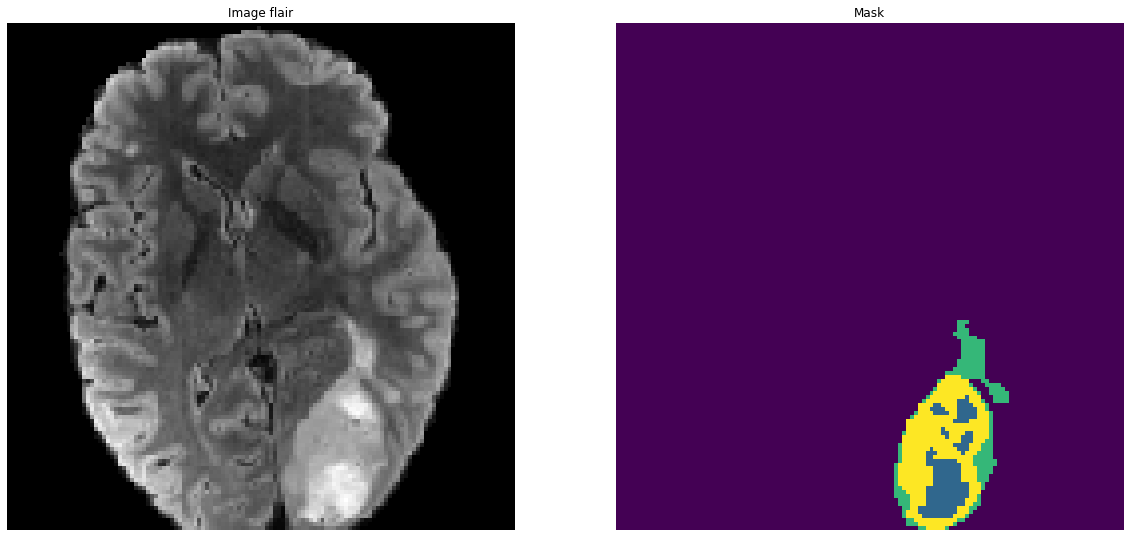

In [23]:
#brain495 = os.path.join(data_path, 'BraTS2021_00495/')
#brain621 = os.path.join(data_path, 'BraTS2021_00621/')

train_generator = BratsGen([data_path + '/BraTS2021_00495/BraTS2021_00495_flair.nii.gz'],
                           [data_path + '/BraTS2021_00495/BraTS2021_00495_t1ce.nii.gz'],
                           [data_path + '/BraTS2021_00495/BraTS2021_00495_t2.nii.gz'],
                           [data_path + '/BraTS2021_00495/BraTS2021_00495_seg.nii.gz'],                  
                           segmenting_subregion=0, aug=False)
img, mask = train_generator.__getitem__(0)

mask = mask[0]
mask = np.argmax(mask, axis=-1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
ax1.imshow(ndimage.rotate(img[0][:,:,63,0], 270), cmap = 'gray')
ax1.set_title('Image flair')
ax1.axis('off')
ax2.imshow(ndimage.rotate(mask[:,:,63], 270), cmap=cmap)
ax2.set_title('Mask')
ax2.axis('off')
plt.show()

0.0 1.0
[0 1 2 3]
mask shape:  (128, 128, 128)
mask type:  int64
img shape:  (1, 128, 128, 128, 3)
[0 1 2 3]


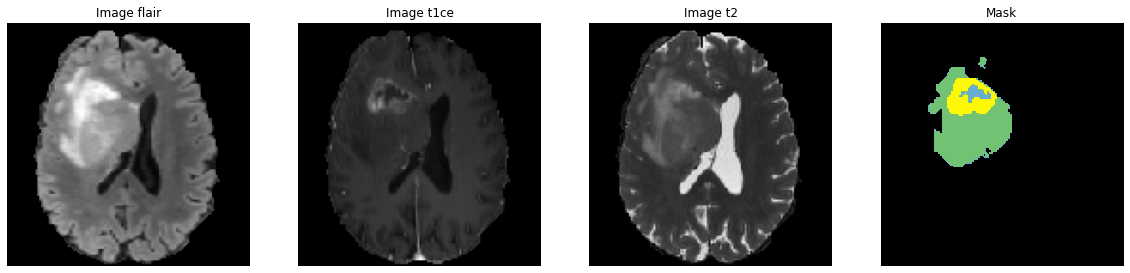

In [17]:
#train_generator = BratsGen(flair_list, t1ce_list, t2_list, mask_list)
train_generator = BratsGen([training_path + 'BraTS2021_00002/BraTS2021_00002_flair.nii.gz'],
                           [training_path + 'BraTS2021_00002/BraTS2021_00002_t1ce.nii.gz'],
                           [training_path + 'BraTS2021_00002/BraTS2021_00002_t2.nii.gz'],
                           [training_path + 'BraTS2021_00002/BraTS2021_00002_seg.nii.gz'],
                           segmenting_subregion=0, aug=False)
img, mask = train_generator.__getitem__(0)

mask = mask[0]
mask = np.argmax(mask, axis=-1)

print(np.min(img[0,:,:,:,2]), np.max(img[0,:,:,:,2]))
print(np.unique(mask))
print('mask shape: ', mask.shape)
print('mask type: ', mask.dtype)

print('img shape: ', img.shape)

print(np.unique(mask))

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 10))
ax1.imshow(ndimage.rotate(img[0][:,:,80,0], 270), cmap = 'gray')
ax1.set_title('Image flair')
ax1.axis('off')
ax2.imshow(ndimage.rotate(img[0][:,:,80,1], 270), cmap = 'gray')
ax2.set_title('Image t1ce')
ax2.axis('off')
ax3.imshow(ndimage.rotate(img[0][:,:,80,2], 270), cmap = 'gray')
ax3.set_title('Image t2')
ax3.axis('off')
ax4.imshow(ndimage.rotate(mask[:,:,80], 270), cmap=cmap)
ax4.set_title('Mask')
ax4.axis('off')
plt.show()

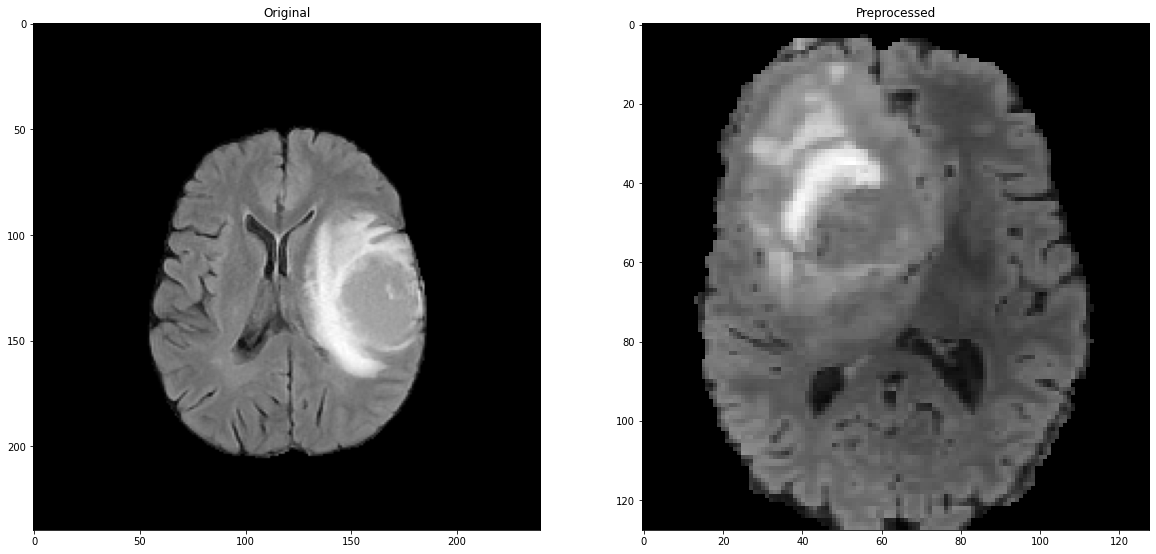

In [393]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
ax1.imshow(ndimage.rotate(test_image_flair[:,:,80], 270), cmap = 'gray')
ax1.set_title('Original')
ax2.imshow(ndimage.rotate(img[0][:,:,67,0], 270), cmap = 'gray')
ax2.set_title('Preprocessed')
plt.show()

In [25]:
volume_start = 0
total_slices = 128
for i in range(volume_start, total_slices, 1):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 10))
    ax1.imshow(ndimage.rotate(img[0][:,:,i,0], 270), cmap = 'gray')
    ax1.set_title('Image flair')
    ax2.imshow(ndimage.rotate(img[0][:,:,i,1], 270), cmap = 'gray')
    ax2.set_title('Image t1ce')
    ax3.imshow(ndimage.rotate(img[0][:,:,i,2], 270), cmap = 'gray')
    ax3.set_title('Image t2')
    ax4.imshow(ndimage.rotate(mask[:,:,i], 270))
    ax4.set_title('Mask')
    fig.savefig(f'outputs/slices/slice_{i}.png')
    plt.close()

(1, 128, 128, 128)


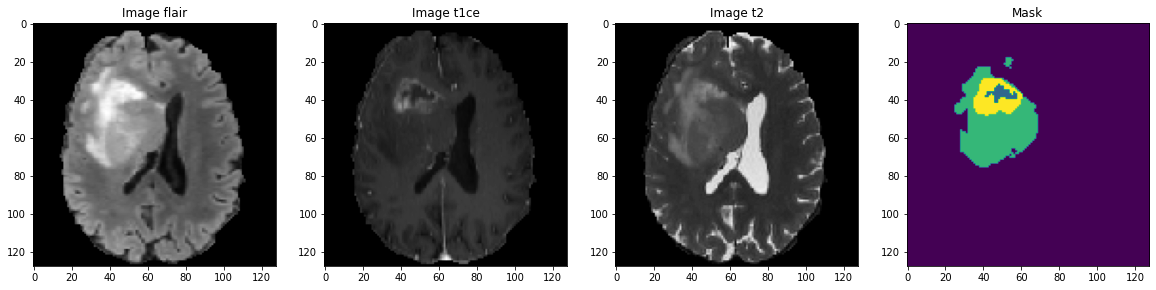

In [26]:
test_img = load_img([training_path + 'BraTS2021_00002/BraTS2021_00002_flair.nii.gz'],
                              [training_path + 'BraTS2021_00002/BraTS2021_00002_t1ce.nii.gz'],
                              [training_path + 'BraTS2021_00002/BraTS2021_00002_t2.nii.gz'], img_channels=3)
test_mask = load_mask([training_path + 'BraTS2021_00002/BraTS2021_00002_seg.nii.gz'])
test_mask = np.argmax(test_mask, axis=-1)
print(test_mask.shape)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 10))
ax1.imshow(ndimage.rotate(test_img[0][:,:,80,0], 270), cmap = 'gray')
ax1.set_title('Image flair')
ax2.imshow(ndimage.rotate(test_img[0][:,:,80,1], 270), cmap = 'gray')
ax2.set_title('Image t1ce')
ax3.imshow(ndimage.rotate(test_img[0][:,:,80,2], 270), cmap = 'gray')
ax3.set_title('Image t2')
ax4.imshow(ndimage.rotate(test_mask[0][:,:,80], 270))
ax4.set_title('Mask')
plt.show()

[0. 1.]
[0 1 2 3]
[[[[0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   ...
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]]

  [[0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   ...
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]]

  [[0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   ...
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]]

  ...

  [[0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   ...
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]]

  [[0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   ...
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]]

  [[0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   ...
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]]]


 [[[0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   ...
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]
   [0 0 0 ... 0 0 0]]

  [[0 0 0 ... 0 0 0]
   [0 0

IndexError: index 2 is out of bounds for axis 3 with size 2

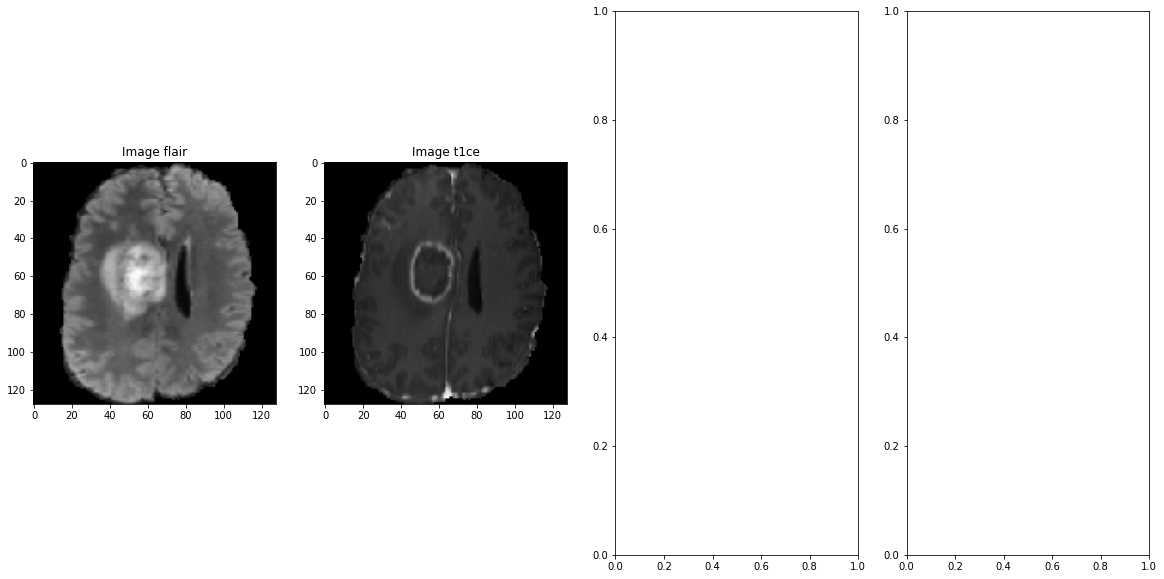

In [27]:
img_datagen = image_loader(flair_list, t1ce_list, t2_list, mask_list, 2,
                                       segmenting_subregion=0)
img, mask = img_datagen.__next__()
print(np.unique(mask))
mask = np.argmax(mask, axis=4)
print(np.unique(mask))
print(mask)

print(np.min(img[0,:,:,:,0]), np.max(img[0,:,:,:,0]))

#print(mask_list[:1])
#print(flair_list[:1])
print(img.shape)
print(mask.shape)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 10))
ax1.imshow(ndimage.rotate(img[0][:,:,80,0], 270), cmap = 'gray')
ax1.set_title('Image flair')
ax2.imshow(ndimage.rotate(img[0][:,:,80,1], 270), cmap = 'gray')
ax2.set_title('Image t1ce')
ax3.imshow(ndimage.rotate(img[0][:,:,80,2], 270), cmap = 'gray')
ax3.set_title('Image t2')
ax4.imshow(ndimage.rotate(mask[0][:,:,80], 270))
ax4.set_title('Mask')
plt.show()

/Users/kuko/Desktop/projekt/BraTS2021/train/BraTS2021_00639/BraTS2021_00639_flair.nii.gz
/Users/kuko/Desktop/projekt/BraTS2021/train/BraTS2021_01149/BraTS2021_01149_flair.nii.gz
/Users/kuko/Desktop/projekt/BraTS2021/train/BraTS2021_01344/BraTS2021_01344_flair.nii.gz
/Users/kuko/Desktop/projekt/BraTS2021/train/BraTS2021_00296/BraTS2021_00296_flair.nii.gz


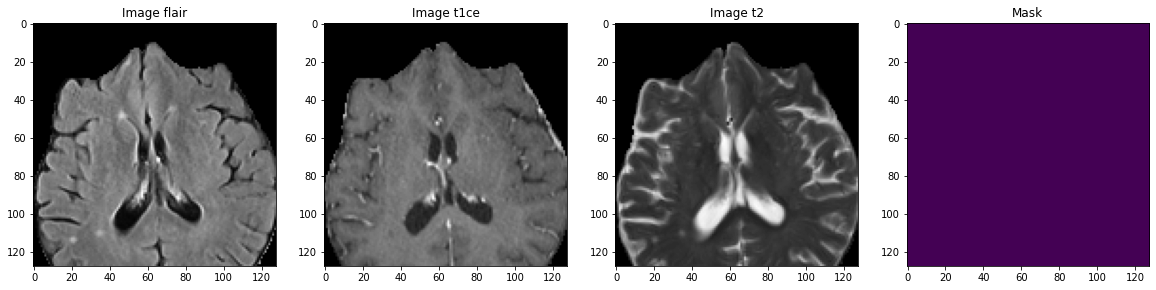

(128, 128, 128)

In [ ]:
batch_size = 4

train_img_datagen = imageLoader(flair_list, t1ce_list, t2_list, mask_list, batch_size)

img, msk = train_img_datagen.__next__()


#img_num = random.randint(0,img.shape[0]-1)
img_num = 2
test_img=img[img_num]
test_mask=msk[img_num]
test_mask=np.argmax(test_mask, axis=3)

#n_slice=random.randint(0, test_mask.shape[2])
n_slice = 70

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 10))
ax1.imshow(ndimage.rotate(test_img[:,:,n_slice,0], 270), cmap = 'gray')
ax1.set_title('Image flair')
ax2.imshow(ndimage.rotate(test_img[:,:,n_slice,1], 270), cmap = 'gray')
ax2.set_title('Image t1ce')
ax3.imshow(ndimage.rotate(test_img[:,:,n_slice,2], 270), cmap = 'gray')
ax3.set_title('Image t2')
ax4.imshow(ndimage.rotate(test_mask[:,:,n_slice], 270))
ax4.set_title('Mask')
plt.show()

test_mask.shape

['.DS_Store', '26', '8', '4']
(256, 256, 176)


Text(0.5, 1.0, 'Image 26')

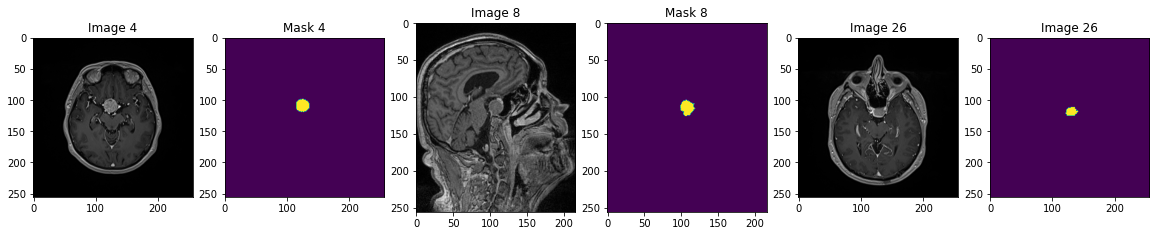

In [29]:
brains_path = 'Hotove_segmentacie/'
print(os.listdir(brains_path))

img4 = nib.load(brains_path + '4/t1_mprage_tra_iso_ce.nii').get_fdata()
mask4 = nib.load(brains_path + '4/Segmentation-label.nii').get_fdata()

img8 = nib.load(brains_path + '8/t1_mpr_sag_p2_iso.nii').get_fdata()
mask8 = nib.load(brains_path + '8/Segmentation-label.nii').get_fdata()

print(mask4.shape)

img26 = nib.load(brains_path + '26/t1_mprage_tra_iso_ce.nii').get_fdata()
mask26 = nib.load(brains_path + '26/Segmentation-label.nii').get_fdata()

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,6, figsize = (20, 10))
ax1.imshow(ndimage.rotate(img4[:,:,80], 270), cmap = 'gray')
ax1.set_title('Image 4')
ax2.imshow(ndimage.rotate(mask4[:,:,80], 270))
ax2.set_title('Mask 4')
ax3.imshow(ndimage.rotate(img8[:,:,80], 270), cmap = 'gray')
ax3.set_title('Image 8')
ax4.imshow(ndimage.rotate(mask8[:,:,80], 270))
ax4.set_title('Mask 8')
ax5.imshow(ndimage.rotate(img26[:,:,80], 270), cmap = 'gray')
ax5.set_title('Image 26')
ax6.imshow(ndimage.rotate(mask26[:,:,80], 270))
ax6.set_title('Image 26')

[0. 1.]
(256, 256, 176)
(1, 128, 128, 128)


Text(0.5, 1.0, 'Image 26')

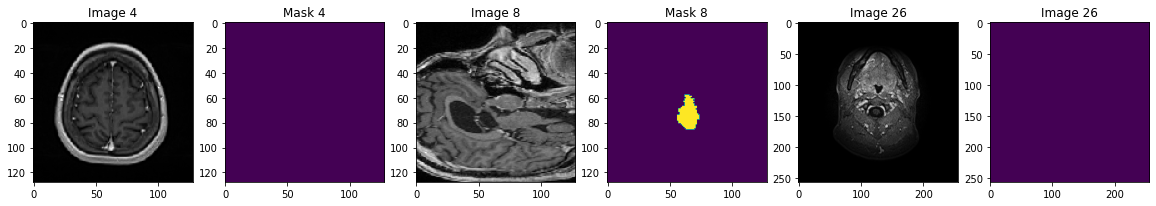

In [158]:
img4 = nib.load(brains_path + '4/t1_mprage_tra_iso_ce.nii').get_fdata()
mask4 = nib.load(brains_path + '4/Segmentation-label.nii').get_fdata()

img8 = nib.load(brains_path + '8/t1_mpr_sag_p2_iso.nii').get_fdata()
mask8 = nib.load(brains_path + '8/Segmentation-label.nii').get_fdata()

img26 = nib.load(brains_path + '26/t1_mprage_tra_iso_ce.nii').get_fdata()
mask26 = nib.load(brains_path + '26/Segmentation-label.nii').get_fdata()

test_img4 = load_img([brains_path + '4/t1_mprage_tra_iso_ce.nii'], 
                    [brains_path + '4/t1_mprage_tra_iso_ce.nii'], 
                    [brains_path + '4/t1_mprage_tra_iso_ce.nii'], 
                    img_channels=2)
test_mask4 = load_mask([brains_path + '4/Segmentation-label.nii'], segmenting_subregion=0)
print(np.unique(test_mask4))
test_mask4 = np.argmax(test_mask4, axis=-1)

#print(img8.shape)
print(img4.shape)

test_img8 = img8[13:141,40:168,13:141]
print(np.array([test_img8]).shape)

volume_start = 40
volume_end = 141
total_slices = 128
tmp_img8 = np.zeros((128, 128, 128))
tmp_mask8 = np.zeros((128, 128, 128))
# resize the images and mask
inter = cv2.INTER_NEAREST
for i in range(total_slices):
    tmp_img8[:, i, :] = cv2.resize(img8[:, i + volume_start, :], (128, 128), interpolation=inter)
    tmp_mask8[:, i, :] = cv2.resize(mask8[:, i + volume_start, :], (128, 128), interpolation=inter)
img8 = tmp_img8
mask8 = tmp_mask8

img8 = np.swapaxes(img8, 1, 2)

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,6, figsize = (20, 10))
ax1.imshow(ndimage.rotate(test_img4[0][:,:,127,0], 270), cmap = 'gray')
ax1.set_title('Image 4')
ax2.imshow(ndimage.rotate(test_mask4[0][:,:,0], 270))
ax2.set_title('Mask 4')
ax3.imshow(img8[:,:,60], cmap = 'gray')
ax3.set_title('Image 8')
ax4.imshow(mask8[:,:,60])
ax4.set_title('Mask 8')
ax5.imshow(ndimage.rotate(img26[:,:,0], 270), cmap = 'gray')
ax5.set_title('Image 26')
ax6.imshow(ndimage.rotate(mask26[:,:,0], 270))
ax6.set_title('Image 26')

### Weights

In [28]:
import pandas as pd
columns = ['0', '1', '2', '3']
#df = pd.DataFrame(columns=columns)
tmp = {0: 0, 1: 0, 2: 0, 3: 0}
for i in range(len(mask_list)):
    #if i == 1: break
    print(i)
    mask = load_mask([mask_list[i]], segmenting_subregion=2)[0]
    #print(temp_image.shape)
    mask = np.argmax(mask, axis=-1)
    values, counts = np.unique(mask, return_counts=True)

    for i, val in enumerate(values):
        tmp[val] += counts[i]
    print(tmp)

'''
label_0 = df['0'].sum()
label_1 = df['1'].sum()
label_2 = df['1'].sum()
label_3 = df['3'].sum()
total_labels = label_0 + label_1 + label_2 + label_3
n_classes = 4
#Class weights claculation: n_samples / (n_classes * n_samples_for_class)
wt0 = round((total_labels/(n_classes*label_0)), 2) #round to 2 decimals
wt1 = round((total_labels/(n_classes*label_1)), 2)
wt2 = round((total_labels/(n_classes*label_2)), 2)
wt3 = round((total_labels/(n_classes*label_3)), 2)
'''

0
{0: 2006671, 1: 90481, 2: 0, 3: 0}
1
{0: 4070284, 1: 124020, 2: 0, 3: 0}
2
{0: 6123076, 1: 168380, 2: 0, 3: 0}
3
{0: 8209684, 1: 178924, 2: 0, 3: 0}
4
{0: 10292060, 1: 193700, 2: 0, 3: 0}
5
{0: 12353845, 1: 229067, 2: 0, 3: 0}
6
{0: 14397449, 1: 282615, 2: 0, 3: 0}
7
{0: 16473702, 1: 303514, 2: 0, 3: 0}
8
{0: 18541197, 1: 333171, 2: 0, 3: 0}
9
{0: 20581812, 1: 389708, 2: 0, 3: 0}
10
{0: 22631482, 1: 437190, 2: 0, 3: 0}
11
{0: 24673245, 1: 492579, 2: 0, 3: 0}
12
{0: 26755726, 1: 507250, 2: 0, 3: 0}
13
{0: 28849021, 1: 511107, 2: 0, 3: 0}
14
{0: 30900171, 1: 557109, 2: 0, 3: 0}
15
{0: 32883927, 1: 670505, 2: 0, 3: 0}
16
{0: 34967013, 1: 684571, 2: 0, 3: 0}
17
{0: 37016286, 1: 732450, 2: 0, 3: 0}
18
{0: 39066857, 1: 779031, 2: 0, 3: 0}
19
{0: 41150717, 1: 792323, 2: 0, 3: 0}
20
{0: 43232725, 1: 807467, 2: 0, 3: 0}
21
{0: 45272587, 1: 864757, 2: 0, 3: 0}
22
{0: 47319551, 1: 914945, 2: 0, 3: 0}
23
{0: 49384070, 1: 947578, 2: 0, 3: 0}
24
{0: 51429113, 1: 999687, 2: 0, 3: 0}
25
{0: 53450132

"\nlabel_0 = df['0'].sum()\nlabel_1 = df['1'].sum()\nlabel_2 = df['1'].sum()\nlabel_3 = df['3'].sum()\ntotal_labels = label_0 + label_1 + label_2 + label_3\nn_classes = 4\n#Class weights claculation: n_samples / (n_classes * n_samples_for_class)\nwt0 = round((total_labels/(n_classes*label_0)), 2) #round to 2 decimals\nwt1 = round((total_labels/(n_classes*label_1)), 2)\nwt2 = round((total_labels/(n_classes*label_2)), 2)\nwt3 = round((total_labels/(n_classes*label_3)), 2)\n"

In [33]:
classes = 2
sum = 0
for key, value in tmp.items():
    sum += value
print(tmp[0]/sum)
print(tmp[1]/sum)
#print(sum/(classes*tmp[0]))
#print(sum/(classes*tmp[1]))
#print(sum/(classes*tmp[2]))
#print(sum/(classes*tmp[3]))

0.9834563703575083
0.01654362964249165


In [32]:
ratio = 31.0 / (500.0 + 31.0)
print(tf.constant([ratio, 1.0 - ratio]))
print(tf.constant([31.0/(500.0 + 31.0), 500.0/(500.0 + 31.0)]))

tf.Tensor([0.05838041 0.9416196 ], shape=(2,), dtype=float32)
tf.Tensor([0.05838041 0.9416196 ], shape=(2,), dtype=float32)


# Model

## Definovanie modelu

In [14]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, concatenate, Conv3DTranspose, BatchNormalization, Dropout, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanIoU


kernel_initializer = 'he_uniform' # Try others if you want

def unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS, num_classes):
  inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS))
  #s = Lambda(lambda x: x / 255)(inputs)   # No need for this if we normalize our inputs beforehand
  s = inputs

  # Contraction path
  c1 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(s)
  c1 = Dropout(0.1)(c1)
  c1 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c1)
  p1 = MaxPooling3D((2, 2, 2))(c1)

  c2 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p1)
  c2 = Dropout(0.1)(c2)
  c2 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c2)
  p2 = MaxPooling3D((2, 2, 2))(c2)

  c3 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c3)
  p3 = MaxPooling3D((2, 2, 2))(c3)

  c4 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c4)
  p4 = MaxPooling3D(pool_size=(2, 2, 2))(c4)

  c5 = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p4)
  c5 = Dropout(0.3)(c5)
  c5 = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c5)

  # Expansive path
  u6 = Conv3DTranspose(128, (2, 2, 2), strides=(2, 2, 2), padding='same')(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c6)

  u7 = Conv3DTranspose(64, (2, 2, 2), strides=(2, 2, 2), padding='same')(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c7)

  u8 = Conv3DTranspose(32, (2, 2, 2), strides=(2, 2, 2), padding='same')(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u8)
  c8 = Dropout(0.1)(c8)
  c8 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c8)

  u9 = Conv3DTranspose(16, (2, 2, 2), strides=(2, 2, 2), padding='same')(c8)
  u9 = concatenate([u9, c1])
  c9 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u9)
  c9 = Dropout(0.1)(c9)
  c9 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c9)

  outputs = Conv3D(num_classes, (1, 1, 1), activation='softmax')(c9)

  model = Model(inputs=[inputs], outputs=[outputs])
  model.summary()

  return model

model = unet_model(128, 128, 128, 3, 4)
print("input shape: ", model.input_shape)
print("output shape: ", model.output_shape)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                28, 3)]                                                           
                                                                                                  
 conv3d_19 (Conv3D)             (None, 128, 128, 12  1312        ['input_2[0][0]']                
                                8, 16)                                                            
                                                                                                  
 dropout_9 (Dropout)            (None, 128, 128, 12  0           ['conv3d_19[0][0]']              
                                8, 16)                                                      

Definovanie tých generátorov pre **trénovanie** a **validáciu**

In [ ]:
train_t2_list = glob.glob(training_path + '/*/*t2.nii.gz')
train_t1ce_list = glob.glob(training_path + '/*/*t1ce.nii.gz')
train_flair_list = glob.glob(training_path + '/*/*flair.nii.gz')
train_mask_list = glob.glob(training_path + '/*/*seg.nii.gz')

val_t2_list = glob.glob(validation_path + '/*/*t2.nii.gz')
val_t1ce_list = glob.glob(validation_path + '/*/*t1ce.nii.gz')
val_flair_list = glob.glob(validation_path + '/*/*flair.nii.gz')
val_mask_list = glob.glob(validation_path + '/*/*seg.nii.gz')

print(train_t2_list)

['BraTS2021_Training/BraTS2021_01453/BraTS2021_01453_t2.nii.gz', 'BraTS2021_Training/BraTS2021_01442/BraTS2021_01442_t2.nii.gz', 'BraTS2021_Training/BraTS2021_01452/BraTS2021_01452_t2.nii.gz', 'BraTS2021_Training/BraTS2021_01451/BraTS2021_01451_t2.nii.gz', 'BraTS2021_Training/BraTS2021_01443/BraTS2021_01443_t2.nii.gz', 'BraTS2021_Training/BraTS2021_01449/BraTS2021_01449_t2.nii.gz', 'BraTS2021_Training/BraTS2021_01440/BraTS2021_01440_t2.nii.gz', 'BraTS2021_Training/BraTS2021_01448/BraTS2021_01448_t2.nii.gz', 'BraTS2021_Training/BraTS2021_01445/BraTS2021_01445_t2.nii.gz', 'BraTS2021_Training/BraTS2021_01446/BraTS2021_01446_t2.nii.gz', 'BraTS2021_Training/BraTS2021_01447/BraTS2021_01447_t2.nii.gz', 'BraTS2021_Training/BraTS2021_01439/BraTS2021_01439_t2.nii.gz', 'BraTS2021_Training/BraTS2021_01438/BraTS2021_01438_t2.nii.gz', 'BraTS2021_Training/BraTS2021_01441/BraTS2021_01441_t2.nii.gz', 'BraTS2021_Training/BraTS2021_01450/BraTS2021_01450_t2.nii.gz', 'BraTS2021_Training/BraTS2021_01444/Bra

Definovanie batch size a data generátora

In [ ]:
batch_size = 2

train_img_datagen = imageLoader(train_flair_list, train_t1ce_list, train_t2_list, train_mask_list, batch_size)
val_img_datagen = imageLoader(val_flair_list, val_t1ce_list, val_t2_list, val_mask_list, batch_size)

Znovu testovanie

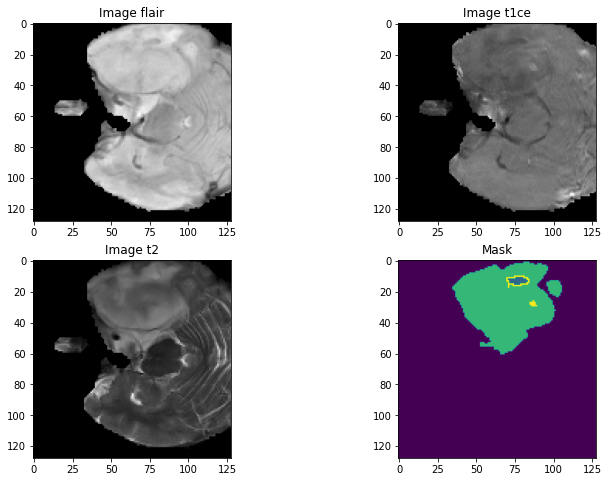

In [ ]:
img, msk = val_img_datagen.__next__()

img_num = random.randint(0,img.shape[0]-1)
test_img=img[img_num]
test_mask=msk[img_num]
test_mask=np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 10))
ax1.imshow(ndimage.rotate(test_img[:,:,n_slice,0], 270), cmap = 'gray')
ax1.set_title('Image flair')
ax2.imshow(ndimage.rotate(test_img[:,:,n_slice,1], 270), cmap = 'gray')
ax2.set_title('Image t1ce')
ax3.imshow(ndimage.rotate(test_img[:,:,n_slice,2], 270), cmap = 'gray')
ax3.set_title('Image t2')
ax4.imshow(ndimage.rotate(test_mask[:,:,n_slice], 270))
ax4.set_title('Mask')
plt.show()

In [ ]:
import keras.backend as K


"""
Dice = (2*|X & Y|)/ (|X|+ |Y|)
     =  2*sum(|A*B|)/(sum(A^2)+sum(B^2))
ref: https://arxiv.org/pdf/1606.04797v1.pdf
"""
def dice_coef(y_true, y_pred, epsilon=0.00001):
    axis = (0,1,2,3)
    dice_numerator = 2. * K.sum(y_true * y_pred, axis=axis) + epsilon
    dice_denominator = K.sum(y_true*y_true, axis=axis) + K.sum(y_pred*y_pred, axis=axis) + epsilon
    return K.mean((dice_numerator)/(dice_denominator))

# define per class evaluation of dice coef
# inspired by https://github.com/keras-team/keras/issues/9395
def dice_coef_necrotic(y_true, y_pred, epsilon=1e-6):
    intersection = K.sum(K.abs(y_true[0,:,:,:,1] * y_pred[0,:,:,:,1]))
    return (2. * intersection) / (K.sum(K.square(y_true[0,:,:,:,1])) + K.sum(K.square(y_pred[0,:,:,:,1])) + epsilon)

def dice_coef_edema(y_true, y_pred, epsilon=1e-6):
    intersection = K.sum(K.abs(y_true[0,:,:,:,2] * y_pred[0,:,:,:,2]))
    return (2. * intersection) / (K.sum(K.square(y_true[0,:,:,:,2])) + K.sum(K.square(y_pred[0,:,:,:,2])) + epsilon)

def dice_coef_enhancing(y_true, y_pred, epsilon=1e-6):
    intersection = K.sum(K.abs(y_true[0,:,:,:,3] * y_pred[0,:,:,:,3]))
    return (2. * intersection) / (K.sum(K.square(y_true[0,:,:,:,3])) + K.sum(K.square(y_pred[0,:,:,:,3])) + epsilon)

Definovanie loss a optimizer

In [ ]:
#!pip install segmentation-models-3D
#!pip install keras_applications
from segmentation_models_3D import losses

# Define loss, metrics and optimizer to be used for training
wt0, wt1, wt2, wt3 = 0.25,0.25,0.25,0.25
dice_loss = losses.DiceLoss(class_weights=np.array([wt0, wt1, wt2, wt3]))
focal_loss = losses.CategoricalFocalLoss()
#total_loss = dice_loss + (1 * focal_loss)
total_loss = dice_loss

#metrics = ['accuracy', sm.metrics.IOUScore(threshold=0.5)]
metrics = ['accuracy', sm.metrics.IOUScore(threshold=0.5), tf.keras.metrics.MeanIoU(num_classes=4),
           dice_coef, dice_coef_necrotic, dice_coef_edema ,dice_coef_enhancing]

## Trénovanie

In [ ]:
LR = 0.0001
optim = tf.keras.optimizers.Adam(LR)

steps_per_epoch = len(train_flair_list)//batch_size
val_steps_per_epoch = len(val_flair_list)//batch_size

model = unet_model(IMG_HEIGHT=128, IMG_WIDTH=128, IMG_DEPTH=128, IMG_CHANNELS=3, num_classes=4)
model.compile(optimizer=optim, loss=total_loss, metrics=metrics)

#print(model.summary())
#print(model.input_shape)
#print(model.output_shape)

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                28, 3)]                                                           
                                                                                                  
 conv3d_57 (Conv3D)             (None, 128, 128, 12  1312        ['input_4[0][0]']                
                                8, 16)                                                            
                                                                                                  
 dropout_27 (Dropout)           (None, 128, 128, 12  0           ['conv3d_57[0][0]']              
                                8, 16)                                                      

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, 
           show_shapes = True,
           show_dtype=False,
           show_layer_names = True, 
           rankdir = 'TB', 
           expand_nested = False, 
           dpi = 70)

Callback

In [ ]:
from keras.callbacks import CSVLogger
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, TensorBoard

csv_logger = CSVLogger('outputs/training.log', separator=',', append=False)

callbacks = [keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=2, verbose=1, mode='auto'),
             keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.000001, verbose=1),
             csv_logger]

'''
callbacks = [keras.callbacks.EarlyStopping(monitor='loss', min_delta=0, patience=2, verbose=1, mode='auto'),
             keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.000001, verbose=1),
             keras.callbacks.ModelCheckpoint(filepath='checkpoints/model_.{epoch:02d}-{val_loss:.6f}.m5',
                                             verbose=1, save_best_only=True, save_weights_only = True),
             csv_logger]
'''

In [ ]:
history=model.fit(train_img_datagen,
          steps_per_epoch=steps_per_epoch,
          epochs=30,
          verbose=1,
          callbacks=callbacks,
          validation_data=val_img_datagen,
          validation_steps=val_steps_per_epoch)

model.save('outputs/brats_3d.h5')

with open('outputs/trainHistoryDict', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-46-a419f2ae3179>", line 7, in <module>
    validation_steps=val_steps_per_epoch)
  File "/usr/local/lib/python3.7/dist-packages/keras/utils/traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.7/dist-packages/keras/engine/data_adapter.py", line 859, in _peek_and_restore
    peek = next(x)
StopIteration

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'StopIteration' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Trace

StopIteration: ignored

## Záver z trénovania

## Trenovanie ešte raz

In [30]:
import segmentation_models_3D as sm
my_model = tf.keras.models.load_model('../brats_3d_2ch.h5', custom_objects={'dice_loss_plus_1focal_loss': total_loss,
                                                         'dice_loss': dice_loss, 
                                                         'iou_score': sm.metrics.IOUScore(threshold=0.5),
                                                         'dice_coef': dice_coef,
                                                         'dice_coef_necrotic': dice_coef_necrotic,
                                                         'dice_coef_edema': dice_coef_edema,
                                                         'dice_coef_enhancing': dice_coef_enhancing
                                                         })

ModuleNotFoundError: No module named 'keras_applications'

In [ ]:
history=my_model.fit(train_img_datagen,
          steps_per_epoch=steps_per_epoch,
          epochs=5,
          verbose=1,
          callbacks=callbacks,
          validation_data=val_img_datagen,
          validation_steps=val_steps_per_epoch)

model.save('brats_3d.h5')

NameError: ignored

In [ ]:
from keras.metrics import MeanIoU

batch_size=8 #Check IoU for a batch of images
test_img_datagen = imageLoader(val_img_dir, val_img_list, 
                                val_mask_dir, val_mask_list, batch_size)

#Verify generator.... In python 3 next() is renamed as __next__()
test_image_batch, test_mask_batch = test_img_datagen.__next__()

test_mask_batch_argmax = np.argmax(test_mask_batch, axis=4)
test_pred_batch = my_model.predict(test_image_batch)
test_pred_batch_argmax = np.argmax(test_pred_batch, axis=4)

n_classes = 4
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(test_pred_batch_argmax, test_mask_batch_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.4409805


In [ ]:
dice_coef(test_mask_batch_argmax, test_pred_batch_argmax)

TypeError: ignored

In [ ]:
results = my_model.evaluate(test_img_datagen, callbacks= callbacks)

    387/Unknown - 4052s 10s/step - loss: 0.8640 - accuracy: 0.9635 - iou_score: 0.4759 - mean_io_u: 0.4188 - dice_coef: 0.6311 - dice_coef_necrotic: 0.2169 - dice_coef_edema: 0.6297 - dice_coef_enhancing: 0.3571

KeyboardInterrupt: ignored

In [ ]:
import keras.backend as K

def dice_coef(y_true, y_pred, smooth=1.0):
    class_num = 4
    for i in range(class_num):
        y_true_f = K.flatten(y_true[:,:,:,i])
        y_pred_f = K.flatten(y_pred[0,:,:,:,i])
        intersection = K.sum(y_true_f * y_pred_f)
        loss = ((2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth))
   #     K.print_tensor(loss, message='loss value for class {} : '.format(SEGMENT_CLASSES[i]))
        if i == 0:
            total_loss = loss
        else:
            total_loss = total_loss + loss
    total_loss = total_loss / class_num
#    K.print_tensor(total_loss, message=' total dice coef: ')
    return total_loss


 
# define per class evaluation of dice coef
# inspired by https://github.com/keras-team/keras/issues/9395
def dice_coef_necrotic(y_true, y_pred, epsilon=1e-6):
    intersection = K.sum(K.abs(y_true[:,:,:,1] * y_pred[0,:,:,:,1]))
    return (2. * intersection) / (K.sum(K.square(y_true[:,:,:,1])) + K.sum(K.square(y_pred[0,:,:,:,1])) + epsilon)

def dice_coef_edema(y_true, y_pred, epsilon=1e-6):
    intersection = K.sum(K.abs(y_true[:,:,:,2] * y_pred[0,:,:,:,2]))
    return (2. * intersection) / (K.sum(K.square(y_true[:,:,:,2])) + K.sum(K.square(y_pred[0,:,:,:,2])) + epsilon)

def dice_coef_enhancing(y_true, y_pred, epsilon=1e-6):
    intersection = K.sum(K.abs(y_true[:,:,:,3] * y_pred[0,:,:,:,3]))
    return (2. * intersection) / (K.sum(K.square(y_true[:,:,:,3])) + K.sum(K.square(y_pred[0,:,:,:,3])) + epsilon)


In [ ]:
import re

def model_eval(img_list, mask_list):
  dice_list = list()
  necrotic_list = list()
  edema_list = list()
  enhancing_list = list()

  for i in range(len(mask_list)):
    test_img = np.load(img_list[i])
    test_mask = np.load(mask_list[i])
    test_mask_argmax=np.argmax(test_mask, axis=3)

    test_img_input = np.expand_dims(test_img, axis=0)
    test_prediction = my_model.predict(test_img_input)
    test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]

    dice_list.append(dice_coef(test_mask, test_prediction).numpy())
    necrotic_list.append(dice_coef_necrotic(test_mask, test_prediction).numpy())
    edema_list.append(dice_coef_edema(test_mask, test_prediction).numpy())
    enhancing_list.append(dice_coef_enhancing(test_mask, test_prediction).numpy())

    m = re.search('/image_(.+?).npy', img_list[i])
    print(f"obrazok: {m.group(1)}")
    print(f"dice_coef: {dice_list[i]} | necrotic: {necrotic_list[i]} | edema: {edema_list[i]} | enhancing: {enhancing_list[i]}")
  
  print(f"\ndice_mean: {np.mean(dice_list)} | necrotic_mean: {np.mean(necrotic_list)} | edema_mean: {np.mean(edema_list)} | enhancing_mean: {np.mean(enhancing_list)}")
  
  worst = np.argsort(dice_list)[:5]
  print("\n5 najhorsich:")
  for i in worst:
    m = re.search('/image_(.+?).npy', img_list[i])
    print(f"obrazok: {m.group(1)}, dice = {dice_list[i]}")

  best = np.argsort(dice_list)[-5:]
  print("\n5 najlepsich:")
  for i in best:
    m = re.search('/image_(.+?).npy', img_list[i])
    print(f"obrazok: {m.group(1)}, dice = {dice_list[i]}")

In [ ]:
img_dir = "skusobny2/input_data_128/val/images/"
mask_dir = "skusobny2/input_data_128/val/masks/"

img_list = glob.glob(img_dir+"*")
mask_list = glob.glob(mask_dir+"*")

In [ ]:
model_eval(img_list, mask_list)

obrazok: 10
dice_coef: 0.45956405997276306 | necrotic: 0.28612977266311646 | edema: 0.3062351644039154 | enhancing: 0.3773258924484253
obrazok: 13
dice_coef: 0.4374447166919708 | necrotic: 0.11599457263946533 | edema: 0.6946755051612854 | enhancing: 0.1201980859041214
obrazok: 14
dice_coef: 0.4893331527709961 | necrotic: 0.23494520783424377 | edema: 0.4276890456676483 | enhancing: 0.4435701072216034
obrazok: 17
dice_coef: 0.5202767252922058 | necrotic: 0.11291379481554031 | edema: 0.7766912579536438 | enhancing: 0.43925848603248596
obrazok: 23
dice_coef: 0.41086697578430176 | necrotic: 0.008660444058477879 | edema: 0.7299948334693909 | enhancing: 0.0005605514161288738
obrazok: 24
dice_coef: 0.44546201825141907 | necrotic: 0.0 | edema: 0.8522852659225464 | enhancing: 0.0032788976095616817
obrazok: 32
dice_coef: 0.6315870881080627 | necrotic: 0.14633893966674805 | edema: 0.8384608626365662 | enhancing: 0.7684392929077148
obrazok: 35
dice_coef: 0.4257975220680237 | necrotic: 0.31599152088

In [ ]:
from matplotlib import pyplot as plt

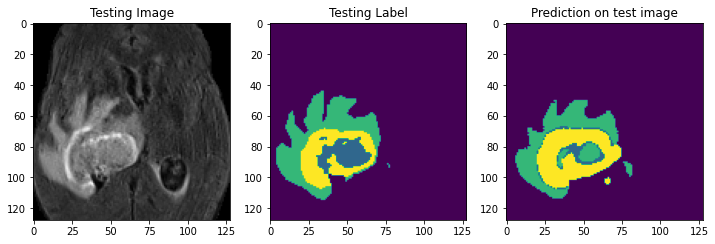

In [ ]:
img_num = 83

test_img = np.load("skusobny2/input_data_128/val/images/image_"+str(img_num)+".npy")
test_mask = np.load("skusobny2/input_data_128/val/masks/mask_"+str(img_num)+".npy")
test_mask_argmax=np.argmax(test_mask, axis=3)

test_img_input = np.expand_dims(test_img, axis=0)
test_prediction = my_model.predict(test_img_input)
test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]

n_slice = 60
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(ndimage.rotate(test_img[:,:,n_slice,0], 270), cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ndimage.rotate(test_mask_argmax[:,:,n_slice], 270))
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(ndimage.rotate(test_prediction_argmax[:,:, n_slice], 270))
plt.show()